In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython import display
import time

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Generate random points and compute pairwise distances
n_points = 10
points = np.random.rand(n_points, 2)
distances = np.zeros((n_points, n_points))
for i in range(n_points):
    for j in range(i + 1, n_points):
        distances[i][j] = distances[j][i] = np.linalg.norm(points[i] - points[j])

# Sort the distances in ascending order
sorted_distances = np.sort(distances.flatten())

# Initialize lists to store triplets of cycles, birth radii, and death radii
cycle_triplets = []

# Initialize set to store cycles present at each step
cycles_present = set()

# Step 2: Find cycles for each radius
for r in sorted_distances:
    # Step 3: Create a graph for points within the radius
    G = nx.Graph()
    for i in range(n_points):
        for j in range(i + 1, n_points):
            if distances[i][j] <= r:
                G.add_edge(i, j)

    # Step 4: Find cycles in the graph
    cycles_at_r = [frozenset(cycle) for cycle in nx.cycle_basis(G)]

    # Check for new cycles and record their birth radius
    new_cycles = set(cycles_at_r) - cycles_present
    for cycle in new_cycles:
        cycle_triplets.append((cycle, r, None))

    # Check for disappeared cycles and record their death radius
    disappeared_cycles = cycles_present - set(cycles_at_r)
    for disappeared_cycle in disappeared_cycles:
        for triplet in cycle_triplets[::-1]:
            cycle, birth_radius, death_radius = triplet
            if cycle == disappeared_cycle and death_radius is None:
                triplet_index = cycle_triplets.index((cycle, birth_radius, None))
                cycle_triplets[triplet_index] = (cycle, birth_radius, r)
                break

    # Update the set of cycles present at this step
    cycles_present = set(cycles_at_r)

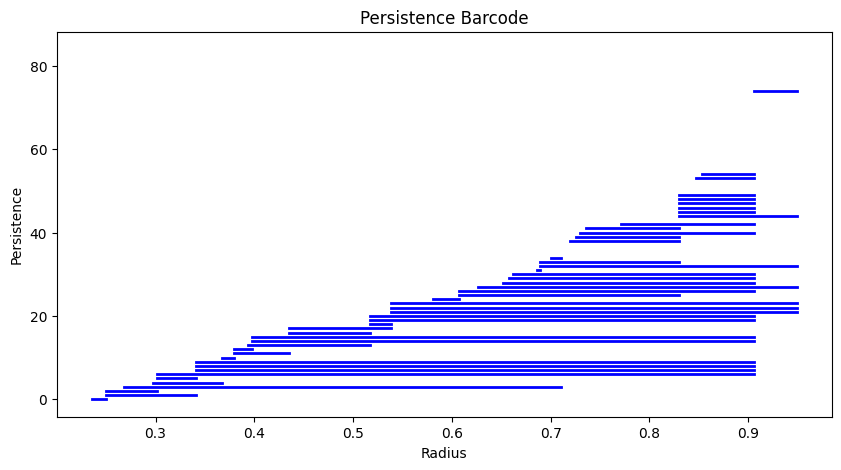

In [12]:
# Plot the persistence barcode
plt.figure(figsize=(10, 5))
for triplet in cycle_triplets:
    _, birth_radius, death_radius = triplet
    plt.plot([birth_radius, death_radius], [cycle_triplets.index(triplet), cycle_triplets.index(triplet)], color='blue', linewidth=2)
plt.xlabel('Radius')
plt.ylabel('Persistence')
plt.title('Persistence Barcode')
plt.show()

In [10]:
# Print triplets of cycles, birth radii, and death radii
for triplet in cycle_triplets:
    cycle, birth_radius, death_radius = triplet
    print("Cycle:", cycle)
    print("Birth Radius:", birth_radius)
    print("Death Radius:", death_radius)
    print()

Cycle: frozenset({8, 1, 2, 5})
Birth Radius: 0.23582370761333107
Death Radius: 0.24995387425250137

Cycle: frozenset({8, 2, 5})
Birth Radius: 0.24995387425250137
Death Radius: 0.3409006451676378

Cycle: frozenset({8, 1, 2})
Birth Radius: 0.24995387425250137
Death Radius: 0.30146694688156506

Cycle: frozenset({0, 9, 4})
Birth Radius: 0.2676151875410173
Death Radius: 0.7104061616078656

Cycle: frozenset({2, 5, 6})
Birth Radius: 0.2969390179837945
Death Radius: 0.36709550752042175

Cycle: frozenset({1, 2, 5})
Birth Radius: 0.30146694688156506
Death Radius: 0.3409006451676378

Cycle: frozenset({8, 1, 5})
Birth Radius: 0.30146694688156506
Death Radius: 0.9055753262070637

Cycle: frozenset({8, 2, 6})
Birth Radius: 0.3409006451676378
Death Radius: 0.9055753262070637

Cycle: frozenset({8, 5, 6})
Birth Radius: 0.3409006451676378
Death Radius: 0.9055753262070637

Cycle: frozenset({8, 1, 2})
Birth Radius: 0.3409006451676378
Death Radius: 0.9055753262070637

Cycle: frozenset({1, 2, 5})
Birth Radiu

KeyboardInterrupt: 

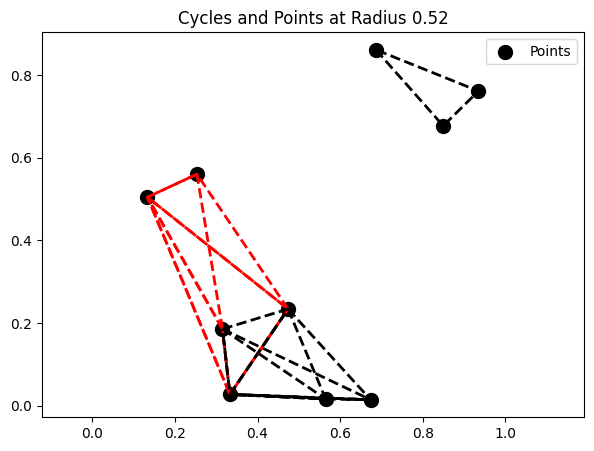

In [15]:
prev_cycles = None  # Previous cycles found
last_cycles = None   # Last cycles found in the current step

# Create a figure for plotting
plt.figure(figsize=(7, 5))

# Step 2: Find cycles for each radius and plot them
for i, r in enumerate(sorted_distances):
    # Create a graph for points within the radius
    G = nx.Graph()
    G.add_nodes_from(range(n_points))
    for i in range(n_points):
        for j in range(i + 1, n_points):
            if distances[i][j] <= r:
                G.add_edge(i, j)

    # Find cycles in the graph
    cycles_at_r = nx.cycle_basis(G)

    # Check if cycles have changed
    if prev_cycles != cycles_at_r:
        # Clear the previous plot
        plt.clf()

        # Plot all points with marker style 'o'
        plt.scatter(points[:, 0], points[:, 1], color='black', marker='o', s=100, label='Points')

        # Plot cycles with dashed lines
        for cycle in cycles_at_r:
            cycle_points = [points[node] for node in cycle]
            cycle_points.append(cycle_points[0])  # Connect last point to the first to close the cycle
            cycle_points = np.array(cycle_points)
            if last_cycles is not None and cycle in last_cycles:
                plt.plot(cycle_points[:, 0], cycle_points[:, 1], color='black', linestyle='dashed', linewidth=2)
            else:
                plt.plot(cycle_points[:, 0], cycle_points[:, 1], color='red', linestyle='dashed', linewidth=2)

        plt.title(f'Cycles and Points at Radius {r:.2f}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)
        plt.axis('equal')

        # Display the current plot
        display.display(plt.gcf())
        display.clear_output(wait=True)

        # Pause to allow time for the plot to be displayed
        time.sleep(0.5)

        # Update previous cycles
        prev_cycles = cycles_at_r

        # Update new cycles
        last_cycles = cycles_at_r

# Close the plot
plt.close()
